We are going to analyze the Standford police data set for Rhode ISLAND state in the USA and try to dig deep in some correlations that exist between the activity . Let's have some fun !

In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress 
import statsmodels.formula.api as smf

In [293]:
ri = pd.read_csv("/Users/Ronfo/Desktop/police.csv")

In [294]:
ri.head(3)

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,4/01/2005,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,23/01/2005,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,17/02/2005,4:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4


In [295]:
ri.columns

Index(['state', 'stop_date', 'stop_time', 'county_name', 'driver_gender',
       'driver_race', 'violation_raw', 'violation', 'search_conducted',
       'search_type', 'stop_outcome', 'is_arrested', 'stop_duration',
       'drugs_related_stop', 'district'],
      dtype='object')

In [296]:
# let's locate missing values

In [297]:
ri.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

In [298]:
# as country name is not needed we can drop that columns

In [299]:
newri= ri.drop("county_name", axis="columns")

In [300]:
newri.head()

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,4/01/2005,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,23/01/2005,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,17/02/2005,4:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,20/02/2005,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,24/02/2005,1:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [301]:
newri.dropna(subset=["stop_date","stop_time"])

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,4/01/2005,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,23/01/2005,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,17/02/2005,4:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,20/02/2005,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,24/02/2005,1:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,RI,31/12/2015,21:21,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2
91737,RI,31/12/2015,21:59,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
91738,RI,31/12/2015,22:04,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3
91739,RI,31/12/2015,22:09,F,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,Zone K3


In [302]:
#lets examine the data types

In [303]:
newri.dtypes

state                 object
stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

In [304]:
combined= newri.stop_date.str.cat(newri.stop_time, sep=" ")

In [305]:
combined

0         4/01/2005 12:55
1        23/01/2005 23:15
2         17/02/2005 4:15
3        20/02/2005 17:15
4         24/02/2005 1:20
               ...       
91736    31/12/2015 21:21
91737    31/12/2015 21:59
91738    31/12/2015 22:04
91739    31/12/2015 22:09
91740    31/12/2015 22:47
Name: stop_date, Length: 91741, dtype: object

In [306]:
#converting to date time format

In [307]:
newri["date_and_time"]= pd.to_datetime(combined)

In [308]:
newri

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,date_and_time
0,RI,4/01/2005,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,2005-04-01 12:55:00
1,RI,23/01/2005,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,2005-01-23 23:15:00
2,RI,17/02/2005,4:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,2005-02-17 04:15:00
3,RI,20/02/2005,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,2005-02-20 17:15:00
4,RI,24/02/2005,1:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,2005-02-24 01:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,RI,31/12/2015,21:21,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2,2015-12-31 21:21:00
91737,RI,31/12/2015,21:59,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,2015-12-31 21:59:00
91738,RI,31/12/2015,22:04,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3,2015-12-31 22:04:00
91739,RI,31/12/2015,22:09,F,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,Zone K3,2015-12-31 22:09:00


In [309]:
#setting the date and time to index col

In [310]:
newri.set_index("date_and_time")

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
date_and_time,,,,,,,,,,,,,,
2005-04-01 12:55:00,RI,4/01/2005,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,RI,23/01/2005,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,RI,17/02/2005,4:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-02-20 17:15:00,RI,20/02/2005,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
2005-02-24 01:20:00,RI,24/02/2005,1:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 21:21:00,RI,31/12/2015,21:21,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2
2015-12-31 21:59:00,RI,31/12/2015,21:59,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2015-12-31 22:04:00,RI,31/12/2015,22:04,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3


Question1- Do the gender commit different violations?

In [311]:
newri.stop_outcome.value_counts()

Citation            77092
Warning              5137
Arrest Driver        2735
No Action             625
N/D                   607
Arrest Passenger      343
Name: stop_outcome, dtype: int64

In [312]:
newri.stop_outcome.value_counts(normalize=True)

Citation            0.890835
Warning             0.059361
Arrest Driver       0.031604
No Action           0.007222
N/D                 0.007014
Arrest Passenger    0.003964
Name: stop_outcome, dtype: float64

In [313]:
# In total 89% are citation for the overall stop reasons..let's dig deep through gender

In [314]:
Female = newri[newri["driver_gender"] == "F"]
Male= newri[newri["driver_gender"] == "M"]

In [315]:
Female.stop_outcome.value_counts(normalize=True)

Citation            0.893876
Warning             0.062463
Arrest Driver       0.023387
No Action           0.008455
N/D                 0.007067
Arrest Passenger    0.004753
Name: stop_outcome, dtype: float64

In [316]:
#89% were stopped for females 

In [317]:
Male.stop_outcome.value_counts(normalize="True")

Citation            0.889710
Warning             0.058172
Arrest Driver       0.034718
N/D                 0.006995
No Action           0.006740
Arrest Passenger    0.003665
Name: stop_outcome, dtype: float64

In [318]:
#for males a percent less but in warning female proportin is higher and males have higher chances of arrest but we will dig deep for arrest 

In [319]:
Female.violation.value_counts(normalize=True)

Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64

In [320]:
Male.violation.value_counts(normalize=True)

Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64

In [321]:
#Females have highest number of speeding violations as compared to males

Question2) Does gender effect who gets the ticket?

In [322]:
#we need to find where both genders had arrest 

In [323]:
Female_and_Arrested= newri[(newri.driver_gender == "F") & (newri.is_arrested== True)]

In [324]:
Female_and_Arrested.shape

(669, 15)

In [325]:
#Total 669 females  were arrested

In [326]:
Male_and_Arrested= newri[(newri.driver_gender == "M") & (newri.is_arrested== True)]

In [327]:
Male_and_Arrested.shape

(2409, 15)

In [328]:
#wow total of 2409 males were arrested

In [329]:
newri.groupby(['district','driver_gender']).is_arrested.value_counts()


district  driver_gender  is_arrested
Zone K1   F              False           2456
                         True              48
          M              False           5638
                         True             154
Zone K2   F              False           4978
                         True             113
          M              False          12140
                         True             431
Zone K3   F              False           5154
                         True             133
          M              False          13774
                         True             499
Zone X1   F              False            499
                         True              10
          M              False           1787
                         True              45
Zone X3   F              False           4723
                         True             132
          M              False          10887
                         True             432
Zone X4   F              False           52

In [330]:
#let's griup by district and driver gender to see any zones have relationhsip with gender and number of arrests

In [331]:
arrested= newri[newri["is_arrested"] ==  True]

Text(0.5, 1.0, 'Count of arrested by district and Gender')

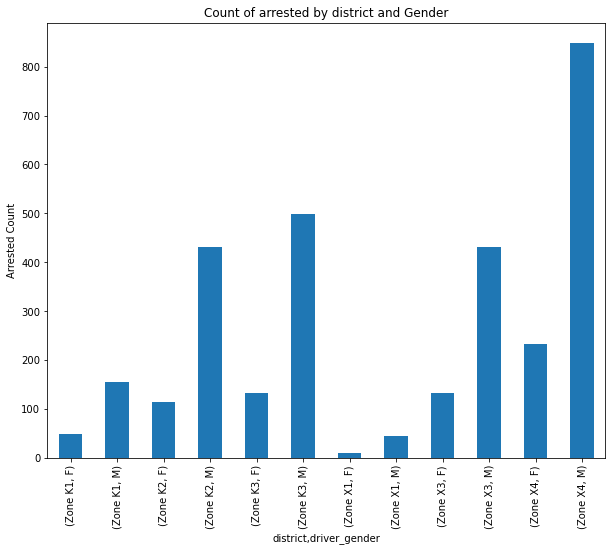

In [332]:
arrested.groupby(["district","driver_gender"]).is_arrested.sum().plot(kind="bar", figsize=(10,8))
plt.ylabel("Arrested Count")
plt.title("Count of arrested by district and Gender")


In [333]:
# as we can see zone x4 has the highest count of arrest and zone x1 has the lowest

Question3) Does the gender effect whose vehicle is searched

In [334]:
newri.search_conducted.value_counts(dropna=False)

False    88434
True      3307
Name: search_conducted, dtype: int64

In [335]:
#exammining the search types

In [336]:
newri.search_type.value_counts()

Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Incident to Arrest,Inventory,Probable Cause                   35
Probable Cause,Protective Frisk                               35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

In [337]:
#lets try to locate the inventory type

In [338]:
newri["inventory"] = newri.search_type.str.contains("Inventory", na=False)

In [339]:
newri.inventory.dtype

dtype('bool')

In [340]:
newri.inventory.value_counts()

False    91300
True       441
Name: inventory, dtype: int64

In [341]:
#True means inventory was done

In [342]:
newri.groupby("driver_gender").inventory.value_counts()

driver_gender  inventory
F              False        23694
               True            80
M              False        62401
               True           361
Name: inventory, dtype: int64

In [343]:
#males were stopped for search due to inventory reasons more than females

In [344]:
#let's try to dig for an overall view

In [345]:
newri.groupby("driver_gender").search_type.value_counts()

driver_gender  search_type                                             
F              Incident to Arrest                                           196
               Probable Cause                                               112
               Inventory                                                     46
               Incident to Arrest,Inventory                                  22
               Protective Frisk                                              18
               Incident to Arrest,Probable Cause                             13
               Reasonable Suspicion                                          12
               Probable Cause,Reasonable Suspicion                           10
               Incident to Arrest,Protective Frisk                            8
               Incident to Arrest,Inventory,Probable Cause                    6
               Inventory,Probable Cause                                       4
               Incident to Arrest,Probable Cause

In [346]:
#men have higher reasons to stop for arrests

Question4) Does gender effects who is frisked during search?

In [347]:
newri["frisk"] = newri.search_type.str.contains("Protective Frisk", na=False)

<AxesSubplot:xlabel='driver_gender,frisk'>

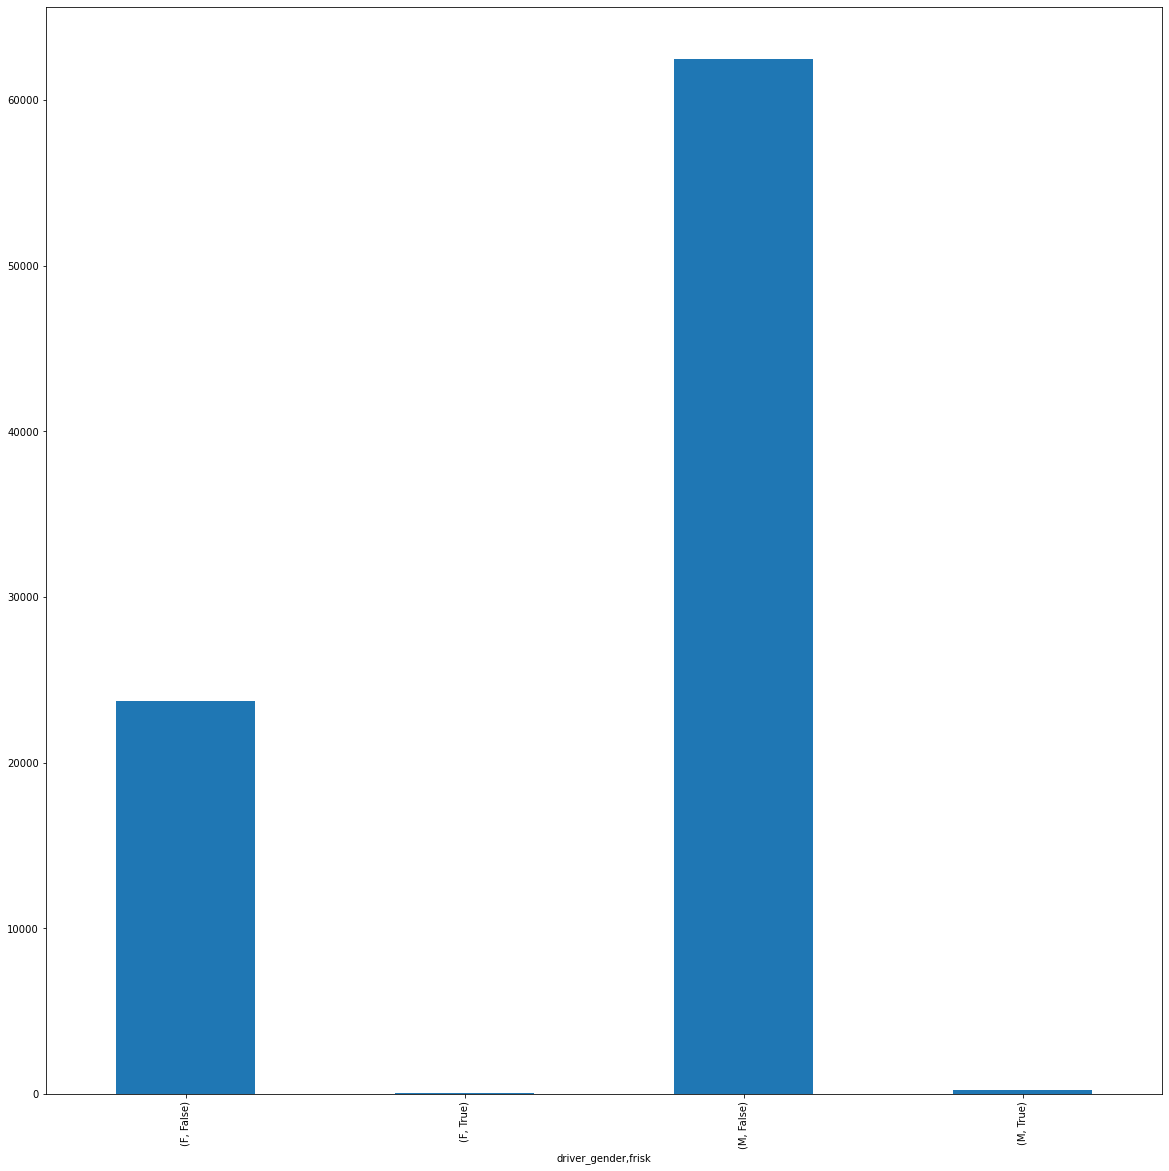

In [348]:
newri.groupby("driver_gender").frisk.value_counts().plot(kind="bar")

In [349]:
#Men have higher count of getting frisk for protective purposes

Question5) Does the day affect the arrest rate

In [350]:
newri

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,date_and_time,inventory,frisk
0,RI,4/01/2005,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,2005-04-01 12:55:00,False,False
1,RI,23/01/2005,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,2005-01-23 23:15:00,False,False
2,RI,17/02/2005,4:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,2005-02-17 04:15:00,False,False
3,RI,20/02/2005,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,2005-02-20 17:15:00,False,False
4,RI,24/02/2005,1:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,2005-02-24 01:20:00,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,RI,31/12/2015,21:21,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2,2015-12-31 21:21:00,False,False
91737,RI,31/12/2015,21:59,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,2015-12-31 21:59:00,False,False
91738,RI,31/12/2015,22:04,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3,2015-12-31 22:04:00,False,False
91739,RI,31/12/2015,22:09,F,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,Zone K3,2015-12-31 22:09:00,False,False


In [351]:
newri['hour'] = newri['date_and_time'].dt.hour

In [352]:
newri

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,date_and_time,inventory,frisk,hour
0,RI,4/01/2005,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,2005-04-01 12:55:00,False,False,12
1,RI,23/01/2005,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,2005-01-23 23:15:00,False,False,23
2,RI,17/02/2005,4:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,2005-02-17 04:15:00,False,False,4
3,RI,20/02/2005,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,2005-02-20 17:15:00,False,False,17
4,RI,24/02/2005,1:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,2005-02-24 01:20:00,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,RI,31/12/2015,21:21,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2,2015-12-31 21:21:00,False,False,21
91737,RI,31/12/2015,21:59,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,2015-12-31 21:59:00,False,False,21
91738,RI,31/12/2015,22:04,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3,2015-12-31 22:04:00,False,False,22
91739,RI,31/12/2015,22:09,F,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,Zone K3,2015-12-31 22:09:00,False,False,22


In [353]:
newri.hour.dtype

dtype('int64')

In [354]:
newri

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,date_and_time,inventory,frisk,hour
0,RI,4/01/2005,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,2005-04-01 12:55:00,False,False,12
1,RI,23/01/2005,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,2005-01-23 23:15:00,False,False,23
2,RI,17/02/2005,4:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,2005-02-17 04:15:00,False,False,4
3,RI,20/02/2005,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,2005-02-20 17:15:00,False,False,17
4,RI,24/02/2005,1:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,2005-02-24 01:20:00,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,RI,31/12/2015,21:21,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2,2015-12-31 21:21:00,False,False,21
91737,RI,31/12/2015,21:59,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,2015-12-31 21:59:00,False,False,21
91738,RI,31/12/2015,22:04,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3,2015-12-31 22:04:00,False,False,22
91739,RI,31/12/2015,22:09,F,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,Zone K3,2015-12-31 22:09:00,False,False,22


In [355]:
newri["arrested"] = newri.is_arrested.astype("bool")

In [356]:
hourlyarrest= newri.groupby("hour").arrested.mean()

Text(0.5, 1.0, 'Arrest rate by time of day')

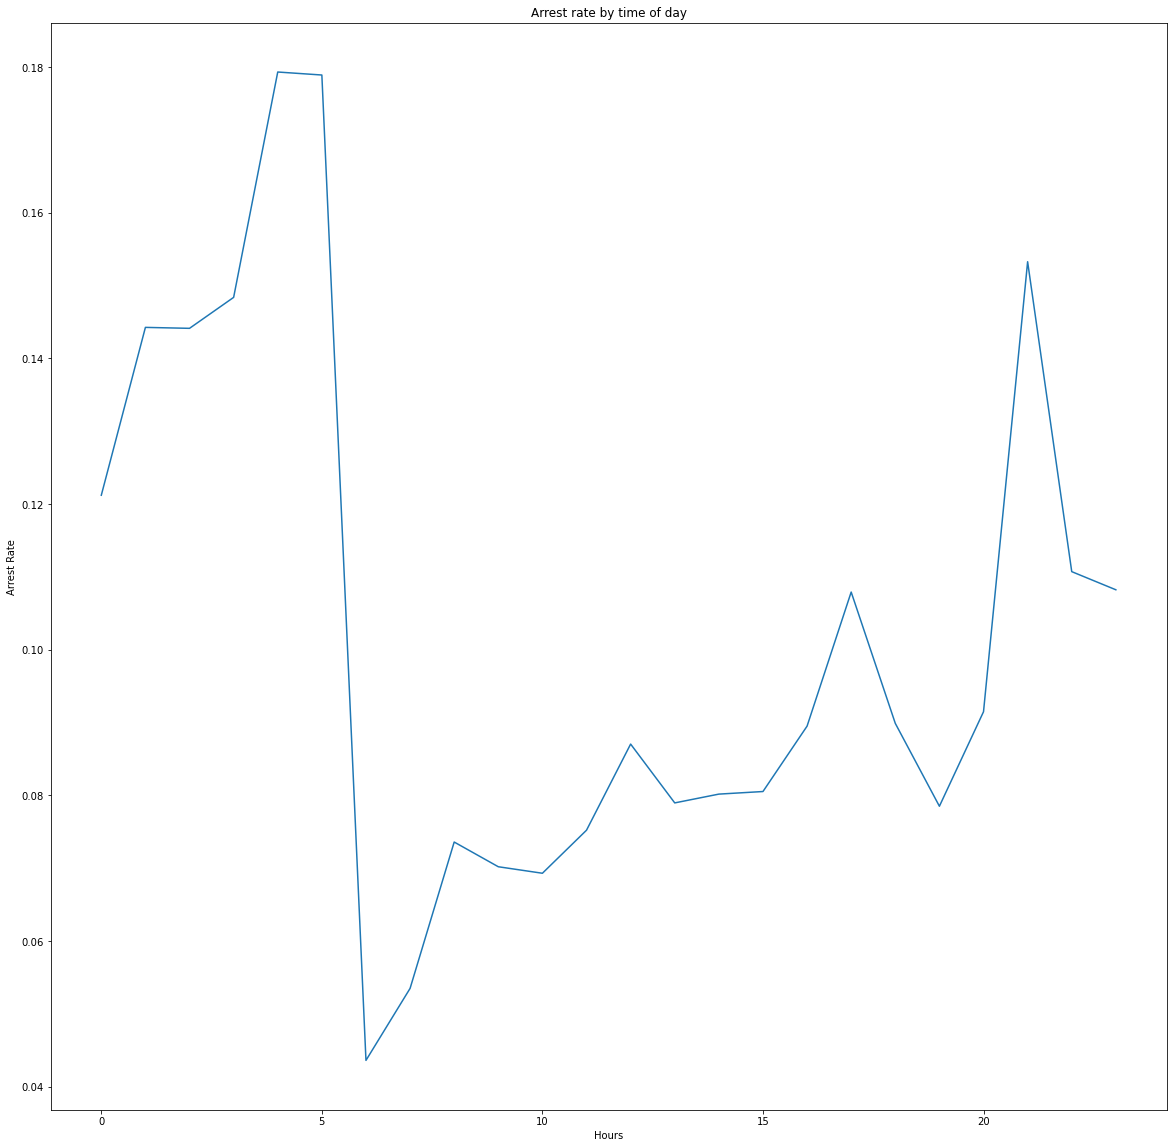

In [357]:
plt.plot(hourlyarrest)
plt.xlabel("Hours")
plt.ylabel("Arrest Rate")
plt.title("Arrest rate by time of day")

In [358]:
#Wow! The arrest rate has a significant spike overnight, and then dips in the early morning hours. # hours 0 to 24 format

Questions6) Are drugs relaed stop on the rise?


In [359]:
newri['year'] = newri['date_and_time'].dt.year

In [360]:
newri

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,date_and_time,inventory,frisk,hour,arrested,year
0,RI,4/01/2005,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,2005-04-01 12:55:00,False,False,12,False,2005
1,RI,23/01/2005,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,2005-01-23 23:15:00,False,False,23,False,2005
2,RI,17/02/2005,4:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,2005-02-17 04:15:00,False,False,4,False,2005
3,RI,20/02/2005,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,2005-02-20 17:15:00,False,False,17,True,2005
4,RI,24/02/2005,1:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,2005-02-24 01:20:00,False,False,1,False,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,RI,31/12/2015,21:21,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2,2015-12-31 21:21:00,False,False,21,False,2015
91737,RI,31/12/2015,21:59,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,2015-12-31 21:59:00,False,False,21,False,2015
91738,RI,31/12/2015,22:04,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3,2015-12-31 22:04:00,False,False,22,False,2015
91739,RI,31/12/2015,22:09,F,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,Zone K3,2015-12-31 22:09:00,False,False,22,False,2015


In [361]:
newri.drugs_related_stop.dtype

dtype('bool')

In [362]:
drugrise= newri.groupby("year").drugs_related_stop.mean()

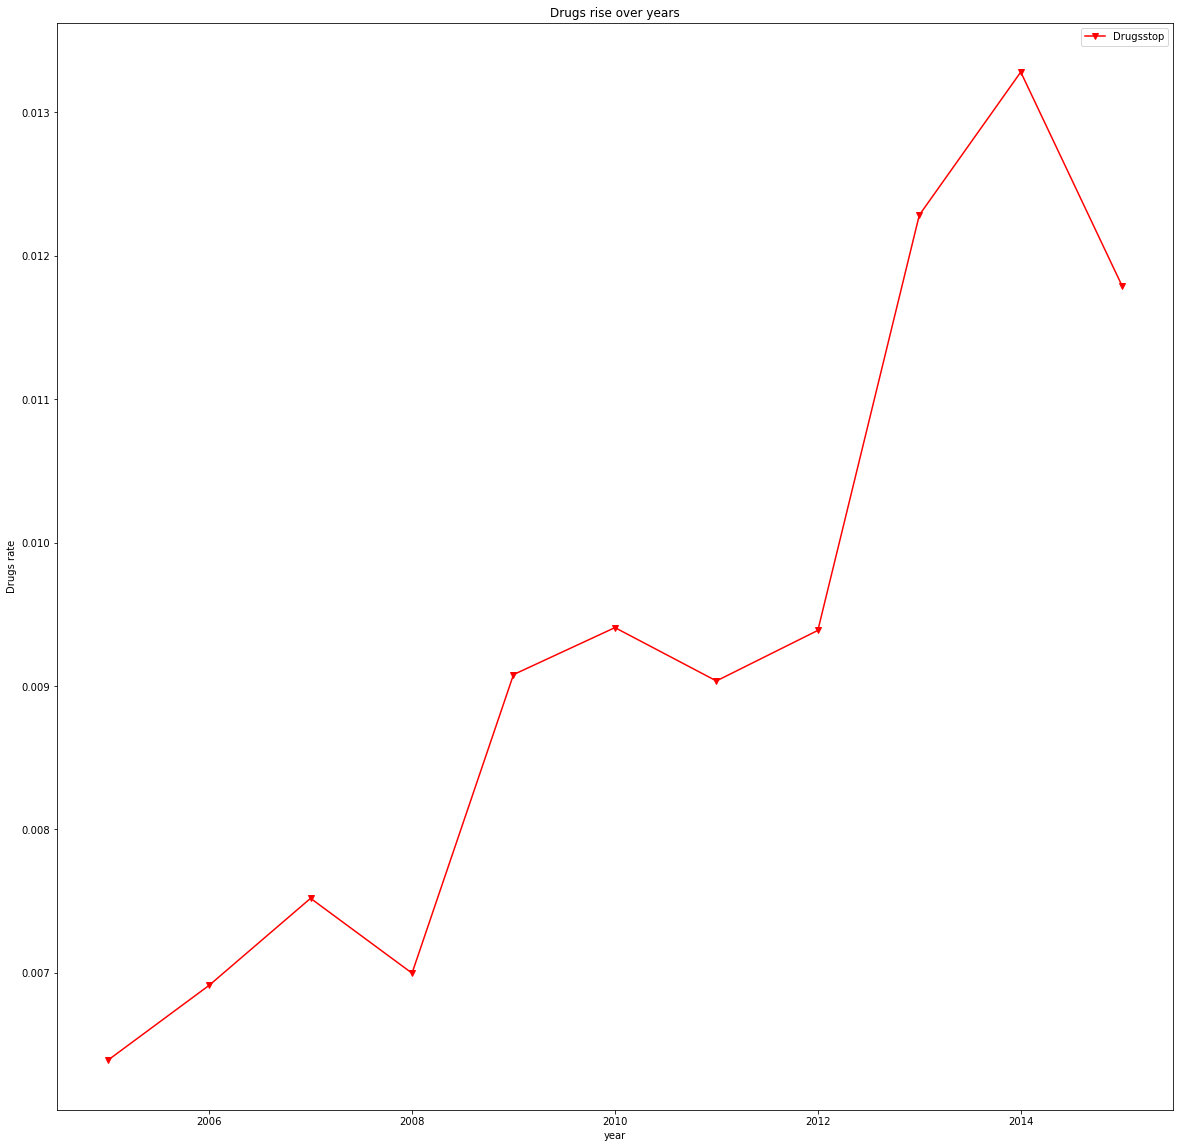

In [363]:
plt.plot(drugrise, color="r", marker="v", label="Drugsstop")
plt.xlabel("year")
plt.ylabel("Drugs rate")
plt.title("Drugs rise over years")
plt.legend()

In [364]:
#Interesting! The rate of drug-related stops nearly doubled over the course of 10 years. Why might that be the case?

In [365]:
searchtrend= newri.groupby("year").search_conducted.mean()

In [366]:
checktrend = pd.concat([drugrise,searchtrend], axis='columns')

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

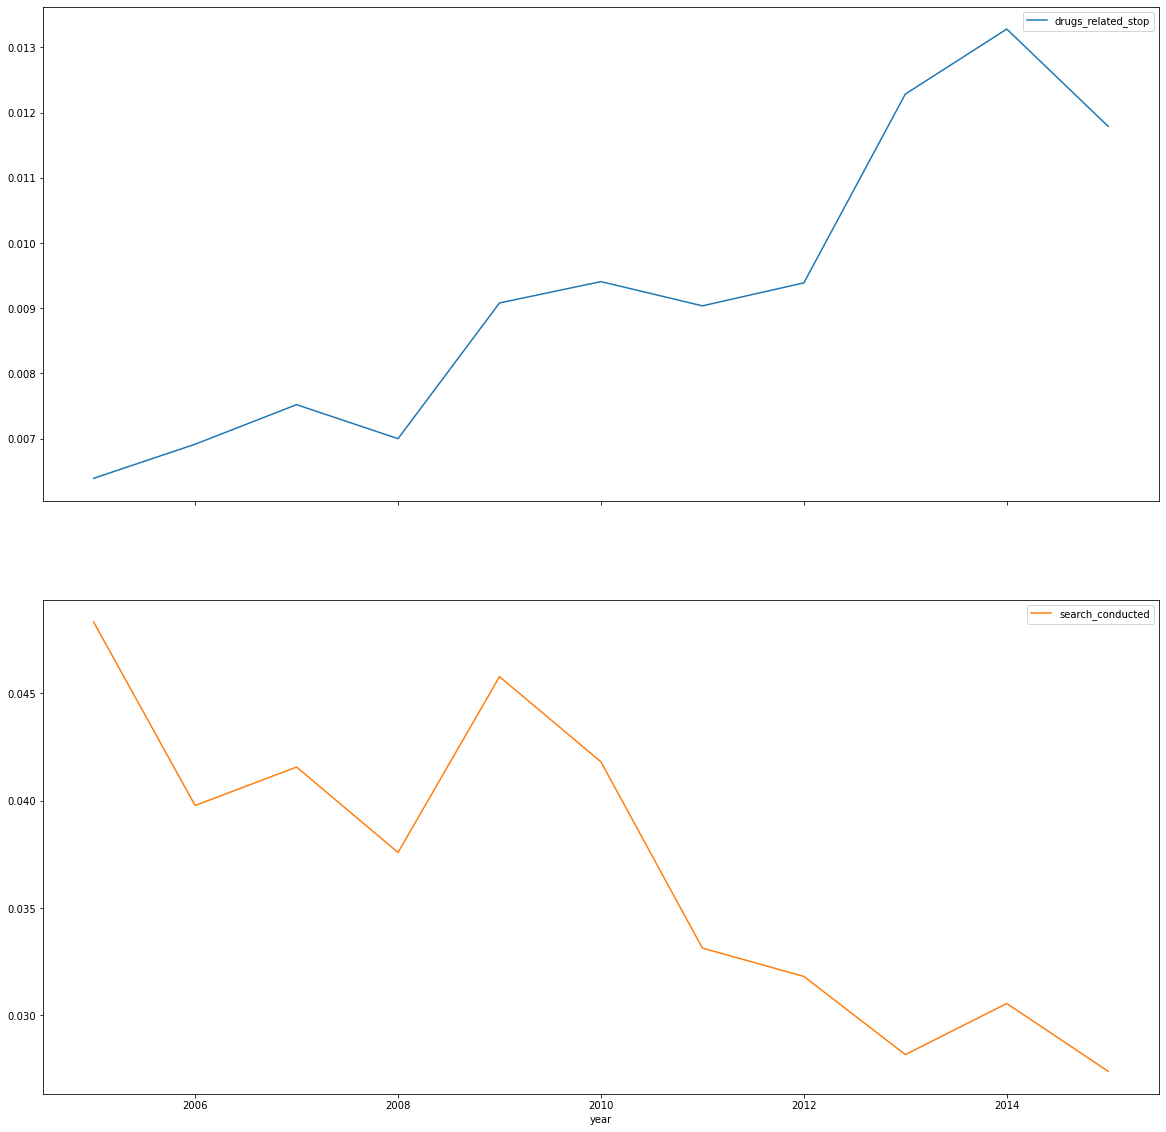

In [367]:
checktrend.plot(subplots=True)

In [368]:
#Wow! The rate of drug-related stops increased even though the search rate decreased, disproving our hypothesis.

Question7) what violations are caught in each district?

In [369]:
# Create a frequency table of districts and violations
print(pd.crosstab(newri.district, newri.violation))

# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(newri.district, newri.violation)

# Select rows 'Zone K1' through 'Zone K3'
print(all_zones.loc['Zone K1':'Zone K3'])

# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1':'Zone K3']

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          673              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    706                  695        638   
Zone X1          296               671    143                   38         74   
Zone X3         2049              3086    769                  671        820   
Zone X4         3541              5353   1560                 1411        843   

violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12323  
Zone X1        1119  
Zone X3        8779  
Zone X4        9795  
violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1      

<AxesSubplot:xlabel='district'>

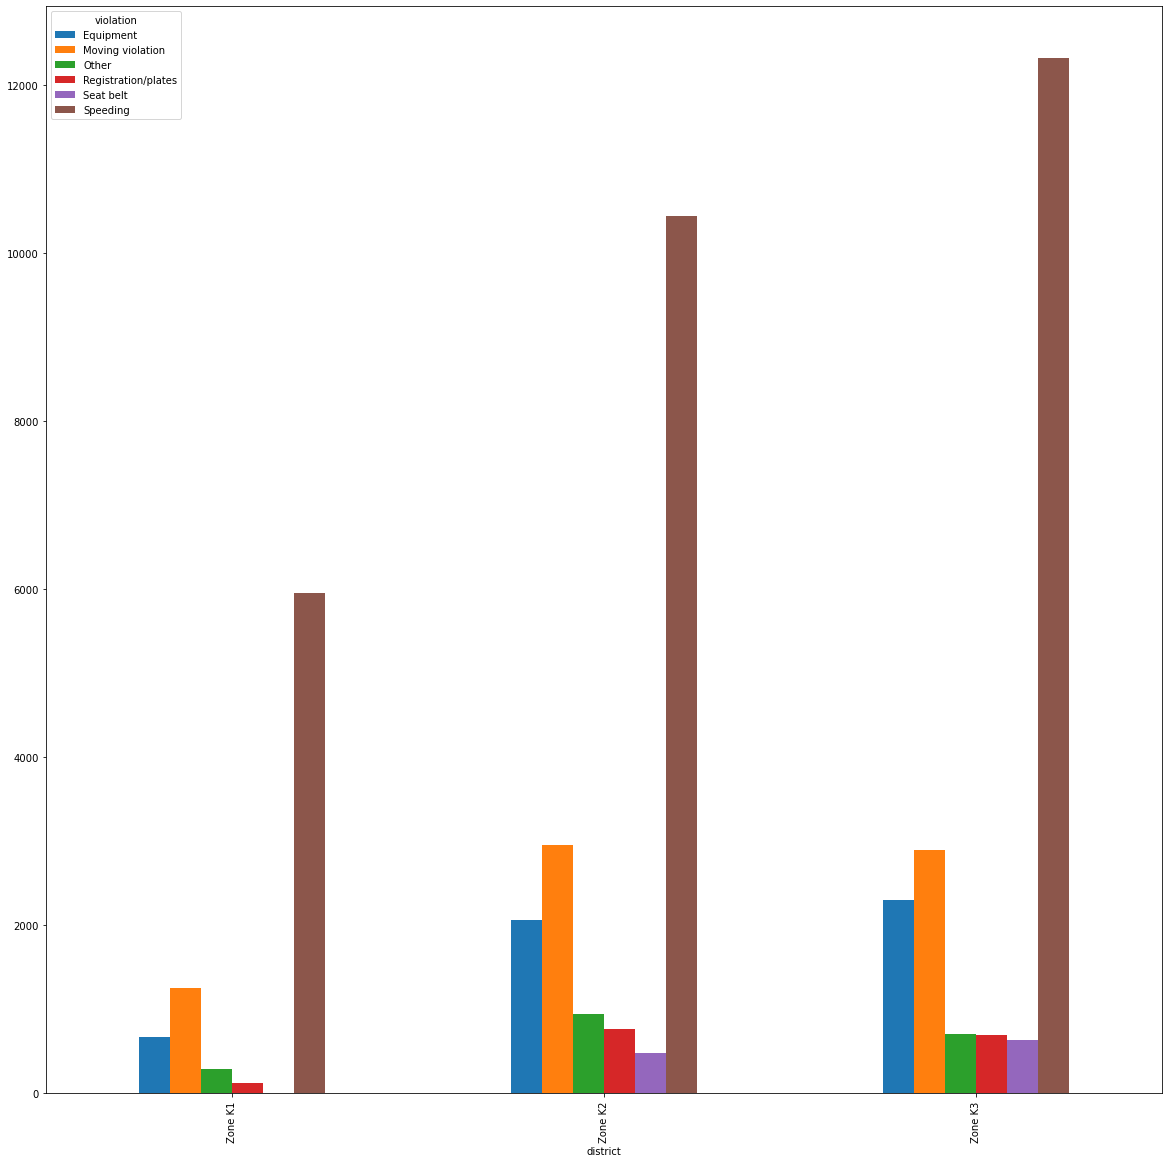

In [370]:
k_zones.plot(kind="bar")

<AxesSubplot:xlabel='district'>

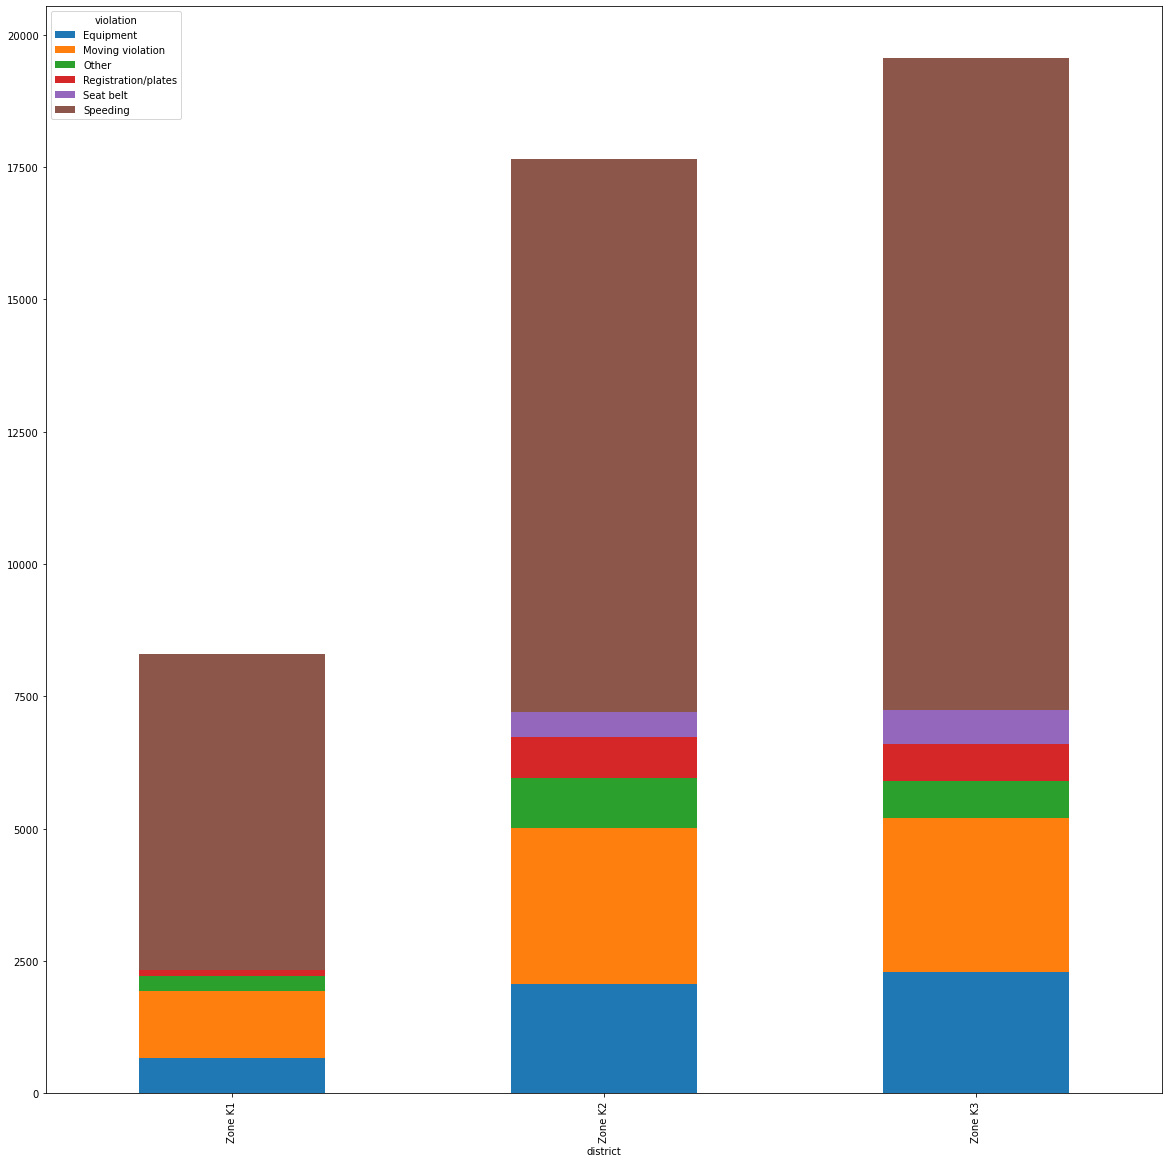

In [371]:

k_zones.plot(kind='bar', stacked=True)



In [372]:
#Interesting! 
#The vast majority of traffic stops in Zone K1 are for speeding, and Zones 
#K2 and K3 are remarkably similar to one another in terms of violations.

Question8) How long might you be stopped for a violation?


In [373]:
# Print the unique values in 'stop_duration'
print(newri.stop_duration.unique())

# Create a dictionary that maps strings to integers
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}

# Convert the 'stop_duration' strings to integers using the 'mapping'
newri['stop_minutes'] = newri.stop_duration.map(mapping)



['0-15 Min' '16-30 Min' nan '30+ Min']


In [374]:
newri.stop_minutes

0         8.0
1         8.0
2         8.0
3        23.0
4         8.0
         ... 
91736     8.0
91737     8.0
91738     8.0
91739     8.0
91740     8.0
Name: stop_minutes, Length: 91741, dtype: float64

violation_raw
APB                                 17.967033
Call for Service                    22.140805
Equipment/Inspection Violation      11.445340
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581509
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64


<AxesSubplot:ylabel='violation_raw'>

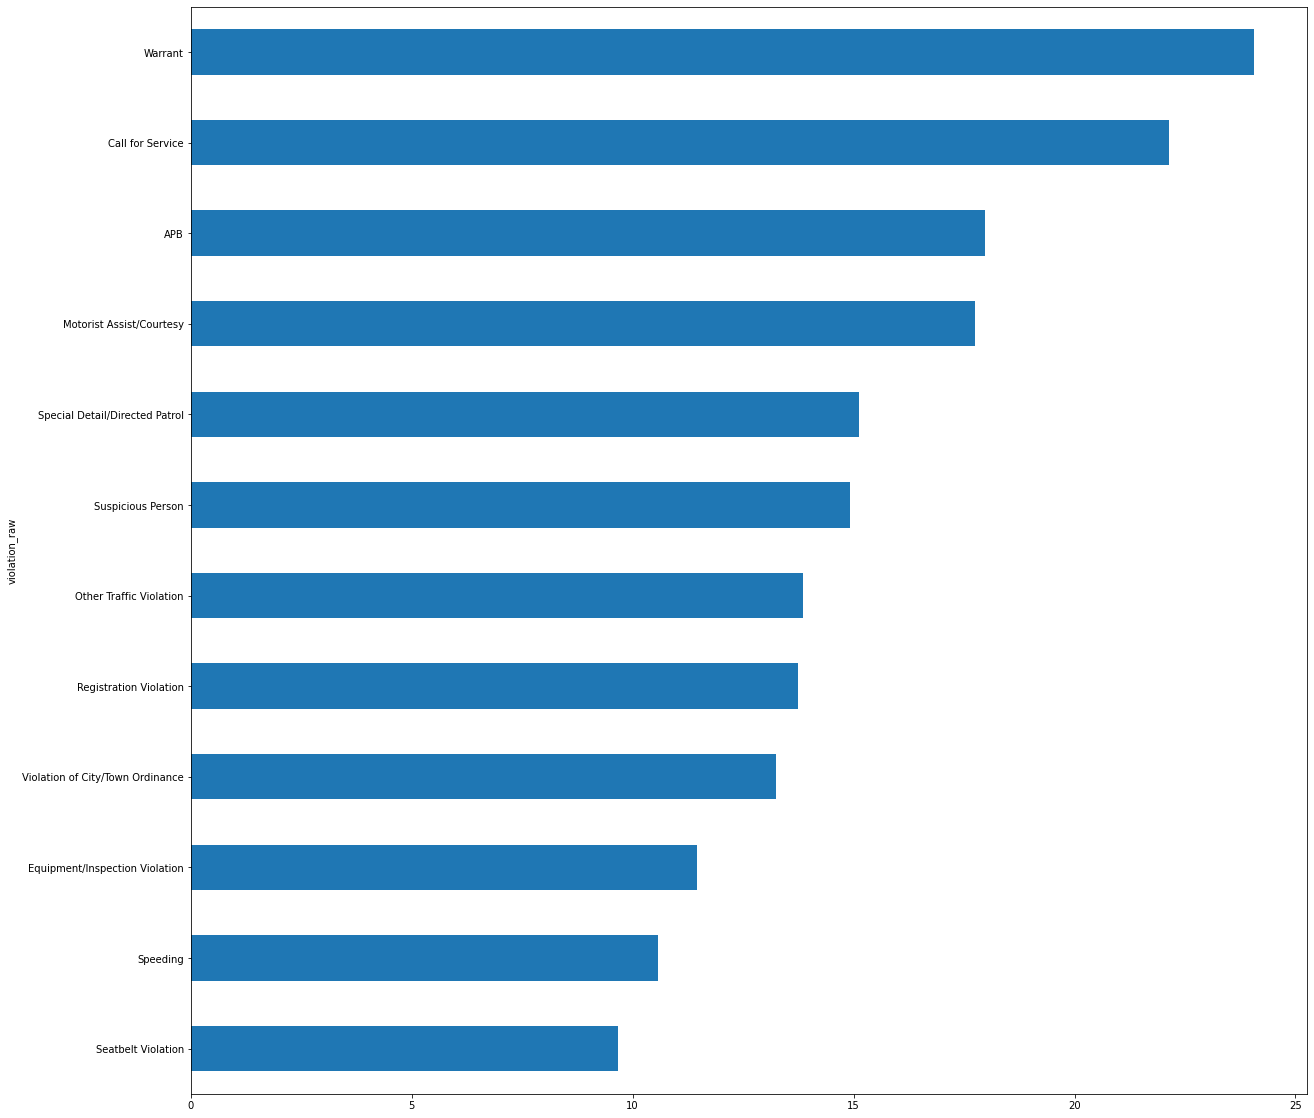

In [375]:
print(newri.groupby('violation_raw').stop_minutes.mean())
stop_length = newri.groupby('violation_raw').stop_minutes.mean()
stop_length.sort_values().plot(kind='barh')

